In [1]:
# Go to general directory

import os
os.chdir('..')

# Workeable libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## <center>**PAPERS CLASSIFICATION METHODOLOGY**</center>

Given the similarity between the papers text, and the isic4 codes descriptions, I generated a similarity matrix between the papers and the product code using the SpaCy library. This notebook is made to define a cutoff to classify with 1 or 0 the each paper.


### **THE SIMILARITY MATRIX**

 The similarity matrix contains the isic4 product code in per column, and the paper code per row index. The current matrix contains 415 columns, and 8195 rows

In [2]:
similarity = pd.read_csv('treatment_data/similarity.csv', index_col=0)
with open('outputs/tables/similarity_example.tex','w') as tf:
    tf.write(similarity.iloc[[1,25,62,80,100], [1,25,62,80,100]].to_latex(index=False))

similarity.iloc[[1, 25, 62, 80, 100], [1, 25, 62, 80, 100]]

C:\Users\00213379\AppData\Local\Temp\ipykernel_11184\3731141167.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(similarity.iloc[[1,25,62,80,100], [1,25,62,80,100]].to_latex(index=False))


,A0112,A0161,C1075,C1430,C2022
ID,,,,,
ECOTEC1,0.518464,0.470635,0.560340,0.609519,0.591099
ECOTEC25,0.581741,0.457425,0.579156,0.653513,0.563400
EPN23,0.552935,0.539934,0.581498,0.622809,0.609423
EPN41,0.617638,0.644388,0.730085,0.745338,0.852803
EPN61,0.511821,0.562773,0.590692,0.632808,0.682699


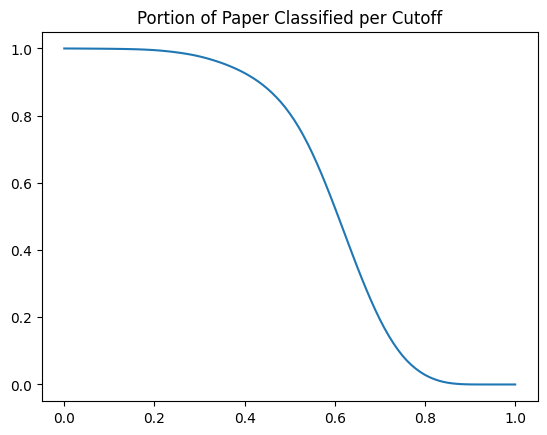

In [3]:
# This code shows the cutoff by all the 
range_base = np.arange(0, 1.01, 0.01)

# Count of observations bigger or equal to the cutoff
count_array = np.zeros(range_base.shape[0])

similarity_matrix = similarity.iloc[:,1:].to_numpy()
for i in range(range_base.shape[0]):
    count_array[i] = (np.where(similarity_matrix>=range_base[i], 1, 0)).sum()
    
# Get the possible values. Also, get free space after redefine similarity_matrix


plt.title('Portion of Paper Classified per Cutoff')
plt.plot(range_base, (count_array / (similarity_matrix.shape[0] * similarity_matrix.shape[1])))
plt.savefig('outputs/graphs/g1_portion_classified.jpg')
plt.show()

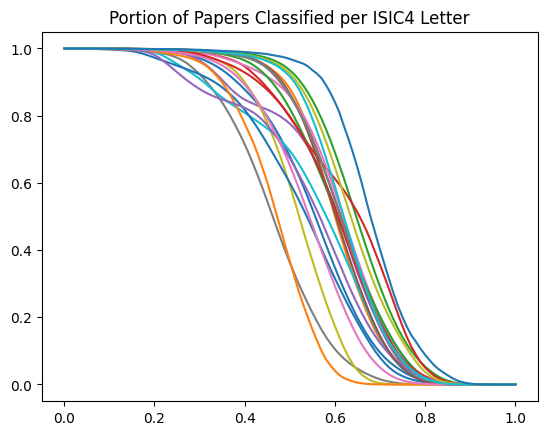

In [4]:
range_base = np.arange(0, 1.01, 0.01)

# We first generate the letter codes

codes_columns = similarity.columns[1:].to_list()

products_codes = [x[0] for x in codes_columns]

products_codes = np.unique(products_codes)

###################################################
### This commented code is to plot by ISIC4 type
##########################################

#######################################################################
for j in products_codes:

    columns_list = [i for i in codes_columns if j in i]
    col_array = similarity[columns_list].to_numpy()

    count_array = np.zeros(range_base.shape[0])

    for i in range(range_base.shape[0]):
        count_array[i] = (np.where(col_array>=range_base[i], 1, 0)).sum()

    col_array = col_array.shape[0] * col_array.shape[1]

    plt.plot(range_base, (count_array / col_array))
####################################################################
plt.title('Portion of Papers Classified per ISIC4 Letter')
plt.savefig('outputs/graphs/g1_2_portion_classified_per_code.jpg')
plt.show()


The graph 1.2 shows that there is an important difference in the portion of papers classified per cutoff. This make relevant to have a different cutoff depending on the code letter

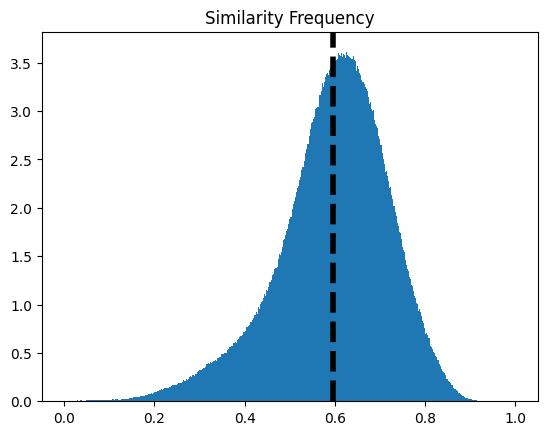

In [5]:
# This code is to show the distribution of the similarity values:

plt.hist(similarity_matrix.flatten(), bins = np.arange(0, 1.001, 0.001), density=True)
plt.axvline(similarity_matrix.flatten().mean(), color='k', linestyle='dashed', linewidth=4)
plt.title("Similarity Frequency") 
plt.savefig('outputs/graphs/g1_3_similarity_frequency.jpg')
plt.show()

### THE GENERAL CUTOFF

Seen the data showed, to select a general cutoff of 0.8 shows as a good initial point to classify the papers. The next code shows the products for what each papers is classified:

In [6]:
# At the mooment, the selected treshold is 80%
normalized_values = np.where((similarity_matrix >= 0.80), similarity_matrix, 0)


papers = pd.DataFrame(index=['product'])
    
# papers

for i in range(len(similarity.index)):
    
    values = normalized_values[i]

    codes = (';').join([similarity.columns.to_list()[j] for j in range(len(values)) if values[j] != 0])
    # This code was to select the three biggest values. 
    # The treshold used was 0.85

    papers = pd.concat([papers, pd.DataFrame({i:codes}, index=['product'])], axis=1)
papers

,0,1,2,3,4,5,6,7,8,9,...,15353,15354,15355,15356,15357,15358,15359,15360,15361,15362
product,,,,,,,,,C2591;C2816,,...,C2591,C2591;C2910,C2591;C2816;C2910;S9529,C2591;C2816;C2910,,A0164;C2021;C2396;C2410;C2520;C2591;C2599;C264...,,C2591;C2816,,C2591


Now, we import the information of the papers to append then to the hole data frame

In [7]:
complete = pd.read_csv('treatment_data/complete.csv', encoding='utf-8')

# save to the text file
with open('outputs/tables/univercities_raw_example.tex','w') as tf:
    tf.write(complete.iloc[[1,25,62,80,100], :].to_latex(index=False))


display(complete.iloc[[1,25,62,80,100], :])


# And now I merge the data. It is important to get the ID as column and not as index
similarity.reset_index(inplace=True)

# Now, I add the province of the paper, and the province of the paper, and the city

papers1 = papers.T
papers1.reset_index(inplace=True)
papers1 = papers1.rename(columns={'index':'ID'})

# Be sure taht you have the IDs columns as str
complete['ID'] = complete['ID'].astype(str)
papers1['ID'] = similarity['ID']

# merge on the left
papers1 = papers1.merge(complete, how='left', on='ID')

# Save as latex to the paper

display(papers1.iloc[[1,25,62,80,100], :])

C:\Users\00213379\AppData\Local\Temp\ipykernel_11184\1838474662.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(complete.iloc[[1,25,62,80,100], :].to_latex(index=False))


,ID,Year,Province,City,Authors,Text
1,ECOTEC1,2018,GUAYAS,GUAYAQUIL,"Espinoza Mina M.A., Gallegos Barzola D.P.",Ethical dimension in the use of computer infra...
25,ECOTEC25,2018,GUAYAS,GUAYAQUIL,"Loor Pilay D.C., Forteza Pons J.J., Sánchez Ch...",Analysis of the perception of the Pajan's popu...
62,EPN23,2018,PICHINCHA,QUITO,"Silva M., Molina P., Aldás M.-B., Valle V.",Biopolymers based on polylactic acid and starc...
80,EPN41,2018,PICHINCHA,QUITO,"Douillet G.A., Kueppers U., Mato C., Chaffaut ...",Revisiting the lacquer peels method with pyroc...
100,EPN61,2018,PICHINCHA,QUITO,"Sirunyan A.M., Tumasyan A., Adam W., Ambrogi F...",Observation of Higgs Boson Decay to Bottom Qua...


,ID,product,Year,Province,City,Authors,Text
1,ECOTEC1,,2018,GUAYAS,GUAYAQUIL,"Espinoza Mina M.A., Gallegos Barzola D.P.",Ethical dimension in the use of computer infra...
25,ECOTEC25,,2018,GUAYAS,GUAYAQUIL,"Loor Pilay D.C., Forteza Pons J.J., Sánchez Ch...",Analysis of the perception of the Pajan's popu...
62,EPN23,,2018,PICHINCHA,QUITO,"Silva M., Molina P., Aldás M.-B., Valle V.",Biopolymers based on polylactic acid and starc...
80,EPN41,C1010;C1020;C1073;C1080;C1103;C1200;C1393;C143...,2018,PICHINCHA,QUITO,"Douillet G.A., Kueppers U., Mato C., Chaffaut ...",Revisiting the lacquer peels method with pyroc...
100,EPN61,C2591,2018,PICHINCHA,QUITO,"Sirunyan A.M., Tumasyan A., Adam W., Ambrogi F...",Observation of Higgs Boson Decay to Bottom Qua...


The next step takes a between one or two hours

In [14]:
# papers2 = papers1.copy()

# # Explode 'product column to get each classification as a row

# papers2['product'] = papers2['product'].str.split(';')
# papers2 = papers2.explode(['product'])
# papers2 = papers2.loc[papers2['product']!='']




,ID,product,Year,Province,City,Authors,Text
8,ECOTEC8,C2591,2018,GUAYAS,GUAYAQUIL,"Cruz Segura Y., Silega Martínez N., Parra Fern...",Description and analysis of design decisions: ...
8,ECOTEC8,C2816,2018,GUAYAS,GUAYAQUIL,"Cruz Segura Y., Silega Martínez N., Parra Fern...",Description and analysis of design decisions: ...
14,ECOTEC14,C2599,2018,GUAYAS,GUAYAQUIL,"Alonso Bobes A.R., Ortiz Torres M., Sorhegui R...",Determination of the satisfaction index of the...
14,ECOTEC14,C2610,2018,GUAYAS,GUAYAQUIL,"Alonso Bobes A.R., Ortiz Torres M., Sorhegui R...",Determination of the satisfaction index of the...
14,ECOTEC14,C2620,2018,GUAYAS,GUAYAQUIL,"Alonso Bobes A.R., Ortiz Torres M., Sorhegui R...",Determination of the satisfaction index of the...
...,...,...,...,...,...,...,...
15358,YACHAY243,J6209,2016,IMBABURA,URCUQUI,"Bouhajja E., Efthymiopoulos T., George I.F., M...",Conjugative transfer of broad host range plasm...
15358,YACHAY243,M7020,2016,IMBABURA,URCUQUI,"Bouhajja E., Efthymiopoulos T., George I.F., M...",Conjugative transfer of broad host range plasm...
15360,YACHAY245,C2591,2016,IMBABURA,URCUQUI,"Dueñas J.F., Jarrett C., Cummins I., Logan–Hin...",Amazonian Guayusa (Ilex guayusa Loes.): A Hist...
15360,YACHAY245,C2816,2016,IMBABURA,URCUQUI,"Dueñas J.F., Jarrett C., Cummins I., Logan–Hin...",Amazonian Guayusa (Ilex guayusa Loes.): A Hist...


In [15]:
# Now, we need to know how connected are the publications with the others. That can be made with the authors and references columns
# The idea is to set a connection as a paper that contains the authors from another in their references

# The output dataframe must have the following columns

# - id: name identifier of the publication
# - year: year of the publication
# - province: 
# - city
# - product: list of products isic4. In the next cells, it will be multiple observations thank of multiple isic4 products per paper

publications = pd.DataFrame(
    columns=[
        'iid', 'iyear', 'iprovince', 'icity', 'iproduct', 'oid', 'oyear', 'oprovince', 'ocity', 'oproduct' 
    ]
)

# Those variables will be used with a i at the beginning of the variable (ex: iid, iyear, iproduct, etc) which means that the variable
# is set to a input observation, or in the papers case, the publication that has been cited. The data fro the publication tha cites
# the i paper, has an o at the beginning of the variable. 

# Append papers that cites the current one

for i in range(len(papers1)):
    name = papers1['ID'][i]
    authors1 = papers1['Authors'][i].split(', ')
    products1 = papers1['product'][i].split(';')

    new_list = [name, papers1['Year'][i], papers1['Province'][i], papers1['City'][i], None, None, None, None, None, None]

    # Search for every value in the papers1 frame, except the select value, if the new ones contains one or more authors in references. 

    # The second foor loop is from i+1 to avoid repeat papers. We want to see how much connected is an author/paper
    for j in range(i+1, len(papers1)):
        authors2 = papers1['Authors'][j]

        
        # Check if almost one author is in references:
        for a in authors1:
            
            if type(authors2) == str:
                if a in authors2:
                    
                    # Complete the output or publication that is citing information (positions are from 5 to 8)
                    new_list[5] = papers1['ID'][j]
                    new_list[6] = papers1['Year'][j]
                    new_list[7] = papers1['Province'][j]
                    new_list[8] = papers1['City'][j]
                    
                    # For every product, for every observation, it is necessary create a new observation in the publications df
                    
                    products2 = papers1['product'][j].split(';')
                    
                    for p1 in products1:
                        
                        if (p1 == 'None') | (p1 == None) | (p1 == ''):
                            continue
                        
                        else:
                        
                            for p2 in products2:
                                
                                if (p1 == p2) | (p2 == 'None') | (p2 == None) | (p2 == ''):
                                    continue
                                
                                else:
                                    new_list[4] = p1
                                    new_list[9] = p2
                                    
                                    publications.loc[len(publications)] = new_list
                                    
                    
                    # It is necessary only one author on the references. I don't want to add the paper more than one for paper cited.
                    
                    break

# Show my baby (with a cutoff of 0.8 similarity, the time is, aprox, 40min):

# Report to the paper appendix


publications['iyear'] = publications['iyear'].astype(float)
publications['oyear'] = publications['oyear'].astype(float)

publications['iyear'] = publications['iyear'].astype(int)
publications['oyear'] = publications['oyear'].astype(int)

publications['iyear'] = publications['iyear'].astype(str)
publications['oyear'] = publications['oyear'].astype(str)

publications['network'] = 'research'

publications.to_csv('treatment_data/publications.csv', encoding='utf-8')
with open('outputs/tables/universities_raw_example.tex','w') as tf:
    tf.write(publications.iloc[[1,25,62,80,100], :].to_latex(index=False))

display(publications.iloc[[1,25,62,80,100], :])

KeyboardInterrupt: 